## Astronomy 534 "Extragalactic Universe" (Winter 2025)

## Project 1

#### proposal idea due: Monday February 10

#### proposal due: Friday February 14

#### project due: Friday February 28

Please upload your project to Canvas as Jupyter Notebook (`.pynb` format). It should contain all your code and plots. You can also attach other supporting files if needed: `.png` will embed with the notebook, `.pdf` will not.

### Criteria for success

* Solution is correct, as a functional dependence and numerical value (50% of points).

* Intermediate steps of derivations are clearly shown, blocks of code are documented with markdown cells that explain what the code does (30% of points).

* Plots are _paper quality_ (20% of points): with clear axis labels, font, legends for lines. The range of $x$ and $y$ axes should be appropriate for plotted values, without large blocks of empty space.

You may discuss how to approach the problems with other students and the instructor, but all code, derivations, and write-up must be your own.

### Learning goals

The purpose of this project is to help you deepen your understanding of the cosmological model and the evolution of the early universe. By doing computational analysis you can explore topics of interest to you and gain practical experience of modeling the universe.

### Task

The project should constitute a more significant computational investigation than a single homework. Take it as far as you can and like, within a reasonable amount of effort.

Choose a topic among those suggested below or your own version related to the early universe and cosmology. Please think of how you may execute it in practice and what specific question you would answer. Write several paragraphs describing the motivation, method, and expected result and submit it with the pre-class assignment due February 10. Then on February 14 submit a more extensive proposal as a Jupyter notebook, including the background and some initial calculations. The goal of this early proposal is to get you started on the actual work on the project, and to allow sufficient time (two weeks) to complete the calculations and discuss broad implications of the result.

For the project itself, you should include all computation and plot the results in a Jupyter notebook. Begin with a couple of paragraphs of background, and then list necessary equations and describe the dataset you are using. Present the computation and your results. Finally, discuss how your result connects to published work or current research. Please include references to any literature you use.

Submit the notebook in Canvas, and also post an abstract, a key plot, and a link to your work in Canvas Discussion to share with your classmates.

### Project

* Use the SDSS galaxy sample to show that the distribution of galaxies on large scales is homogeneous and isotropic, thus confirming the cosmological principle. We know there is galaxy clustering on small scales, so you need to determine an appropriate range of distances where the distribution is sufficiently uniform. Justify your choice of galaxy sample. Describe a method to test for isotropy.

In [1]:
import numpy as np
import pandas as pd
import healpy as hp

from scipy.stats import poisson

import matplotlib.pyplot as plt

from astropy.io.fits import getdata
from astropy.coordinates import SkyCoord
import astropy.units as u
import astropy.constants as const

plt.style.use('../mplstyle.txt')

# Abstract

#### The Cosmological Principle - the assumption of homogeneity and isotropy on large scales - is fundamental to modern cosmology. Using the latest data release from the Sloan Digital Sky Survey (SDSS DR18), I test this principle by analyzing the large-scale distribution of galaxies. I minimize observational biases by selecting galaxies within the redshift range $0.03 \leq z \leq 0.14$  and Galactic latitude  $b \geq 60^\circ $, transforming their positions into Galactic Cartesian coordinates. Homogeneity is tested by constructing 3D grids of cubic cells with different side lengths, measuring the number density and its dispersion. I find that the universe becomes homogeneous at scales larger than 40 Mpc, where the density stabilizes and dispersion decreases. To test isotropy, I examine the sky density distribution using HEALPix tessellation. This analysis shows isotropy for pixel areas larger than a certain threshold, supporting isotropy on large angular scales.

# Background

#### The Cosmological Principle is at the root of modern cosmology, asserting that the universe is homogeneous on large scales, meaning no preferred location, and isotropic, implying no preferred direction. An ideal dataset to test the isotropy of the universe is the Cosmic Microwave Background (CMB), which reveals a remarkably uniform temperature in all directions across the sky. Space missions such as COBE (Cosmic Background Explorer), WMAP (Wilkinson Microwave Anisotropy Probe), and Planck have provided high-precision measurements of the CMB, confirming its near-perfect blackbody spectrum. These space-based observations have been complemented by ground-based telescopes like the Atacama Cosmology Telescope (ACT) and the South Pole Telescope (SPT), as well as balloon-borne experiments like BOOMERanG (Balloon Observations Of Millimetric Extragalactic Radiation And Geophysics). In addition to its remarkable uniformity, the CMB exhibits small temperature fluctuations, which are crucial for understanding the early universe and constraining cosmological parameters (Sarkar et al. 2019, Maartens 2011). 

#### While the universe is isotropic and homogeneous on the largest scales, it exhibits significant structure at smaller scales, including galaxy clusters, filaments, and voids. These structures arise from primordial quantum fluctuations that grew through gravitational instability as the universe expanded. Initially formed as dark matter halos, these overdensities attracted baryonic matter, leading to the complex web of large-scale structure we observe today. Mapping the distribution of galaxies across the cosmos provides an additional and independent way to test the isotropy and homogeneity of the universe (Longo 2014). Several major redshift surveys have contributed to this effort, including 2dFGRS (2-degree Field Galaxy Redshift Survey), SDSS (Sloan Digital Sky Survey) and DES (Dark Energy Survey). In this project, I will test the validity of the Cosmological Principle and identify the scales on which it holds true using the latest data release from the Sloan Digital Sky Survey (SDSS).

# Dataset

#### The Sloan Digital Sky Survey (SDSS) is a pioneering photometric and spectroscopic survey that has mapped stars, galaxies, and other celestial objects since 1998. By providing public access to its data releases, SDSS has set the standard for open science and big data practices in modern astronomy. Photometric observations have been conducted using the $ugriz$ filters, with optical spectra collected throughout its various phases and, more recently, infrared spectra as well. Initially, SDSS focused on a large-scale imaging effort covering 800 square degrees and obtained spectra for over 700,000 objects. Over time, it has expanded its scope to include targeted surveys, such as supernovae, Milky Way, and black holes oriented programs. The latest data release, DR18, marks the first public release from the fifth phase of the survey (SDSS-V) and serves as the dataset for this project (Almeida et al. 2023).

#### A common way to access SDSS data is through the SDSS SkyServer (https://skyserver.sdss.org/dr18), which provides a user-friendly interface but has a limit of 5,000 entries per query. I used the SDSS CasJobs portal (https://skyserver.sdss.org/CasJobs/default.aspx), which is designed for larger and complex queries. In this project, I queried the positions, colors, and redshifts of all galaxies with valid redshifts in DR18, ensuring a comprehensive dataset for testing the Cosmological Principle. The following figure shows a screenshot of the query used to retrieve this data.

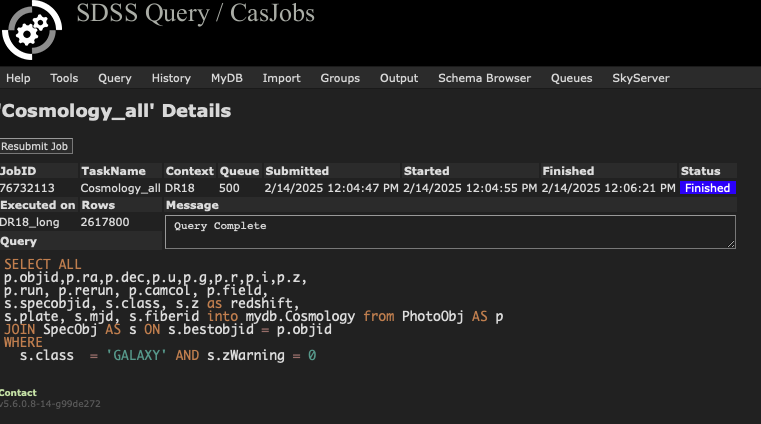

# Methods and Results

In [2]:
data = pd.read_csv('Cosmology_lesamz_0.csv')
data = data.query('z>=0').copy() # remove negative redshift objects
data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237649919504548262,19.558349,14.172212,22.64381,21.83651,20.29011,19.43595,18.94044,1035,301,3,92,5255882013886666752,GALAXY,0.522229,4668,56211,659
1,1237649919504548265,19.559373,14.176793,25.77943,22.11356,20.50458,19.54452,19.02022,1035,301,3,92,5784918074512922624,GALAXY,0.522690,5138,55830,161
2,1237649919504548356,19.603167,14.249642,23.46558,21.85381,20.22467,19.20017,18.62634,1035,301,3,92,5784920823291992064,GALAXY,0.522410,5138,55830,171
3,1237649919504548467,19.665646,14.254676,23.55772,22.14520,20.41287,19.54036,19.04880,1035,301,3,92,5255892459247130624,GALAXY,0.486096,4668,56211,697
4,1237649919504548521,19.529948,14.283654,25.14486,23.19312,20.96252,19.82415,19.29616,1035,301,3,92,5255880364619225088,GALAXY,0.654154,4668,56211,653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617795,1237680332168496809,338.064792,26.822092,24.86475,23.59149,21.95745,20.71533,19.89436,8116,301,3,100,8617835097411049472,GALAXY,0.720039,7654,57330,717
2617796,1237680332168561168,338.215982,26.957067,24.01492,22.99400,21.22151,19.95739,19.37230,8116,301,3,101,7089855864262383616,GALAXY,0.639556,6297,56218,233
2617797,1237680332168561251,338.246251,26.991138,23.95438,23.27670,21.13181,20.04236,19.19642,8116,301,3,101,8614327110998448128,GALAXY,0.690927,7651,57654,243
2617798,1237680332168561752,338.151051,26.997739,22.64219,21.29297,20.25639,19.52724,19.13922,8116,301,3,101,8617846917161048064,GALAXY,0.892560,7654,57330,760


#### The SDSS DR18 catalog contains around 2.5 million galaxies as can be seen in the next plot:

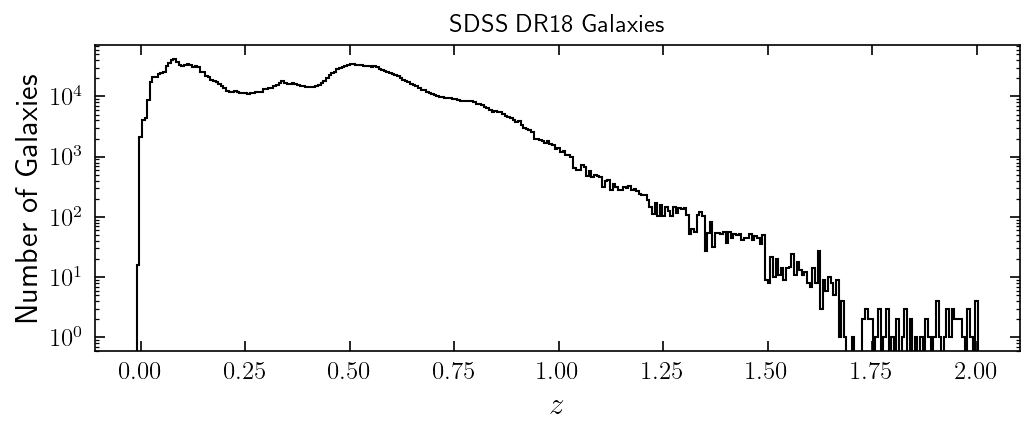

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3), dpi=150)
ax.hist(data['redshift'], bins='scott', histtype='step', color='k')
ax.set_xlabel('$z$')
ax.set_ylabel('Number of Galaxies')
ax.set_title('SDSS DR18 Galaxies')
ax.set_yscale('log')
fig.tight_layout()

#### However, as with any observational endeavor, SDSS suffers from biases that need to be considered when performing population-level analysis. The first evident bias from the previous plot is that the data is limited to redshifts  $z < 2 $. The second bias is related to the survey footprint itself, which shows that the SDSS dataset is mostly concentrated in the northern galactic cap, as illustrated in the next plot.


In [4]:
ra_range = np.array([150, 200])
dec_range = np.array([0, 50])

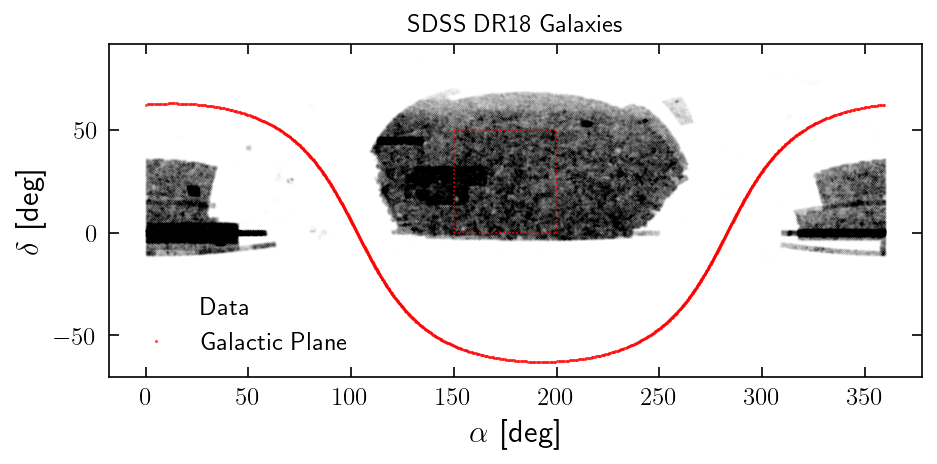

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5), dpi=150)
# fig = plt.figure(figsize=(7, 5), dpi=150)
# ax = fig.add_subplot(projection='mollweide')

ax.plot(data['ra'], data['dec'], 'k.', markersize=0.002, label='Data')

ax.plot([ra_range[0], ra_range[1]], [dec_range[0], dec_range[0]], ':', color='r', lw=0.75)
ax.plot([ra_range[0], ra_range[1]], [dec_range[1], dec_range[1]], ':', color='r', lw=0.75)
ax.plot([ra_range[0], ra_range[0]], [dec_range[0], dec_range[1]], ':', color='r', lw=0.75)
ax.plot([ra_range[1], ra_range[1]], [dec_range[0], dec_range[1]], ':', color='r', lw=0.75)

ax.set_xlabel(r'$\alpha$ [deg]')
ax.set_ylabel(r'$\delta$ [deg]')

l_vals = np.linspace(0, 360, 1000)  # Galactic longitude (l)
b_vals = np.zeros_like(l_vals)  # Galactic latitude (b = 0°)
gal_plane = SkyCoord(l=l_vals*u.deg, b=b_vals*u.deg, frame='galactic').transform_to('icrs')
ax.plot(gal_plane.ra.deg, gal_plane.dec.deg, 'r.', ms=1, alpha=0.7, label="Galactic Plane")
ax.legend()
ax.set_title('SDSS DR18 Galaxies')
ax.set_aspect('equal')

#### As a visual example of the structure of the universe at different scales, we examine a patch of the sky between 150 and 200 degrees in RA and 0 and 50 degrees in DEC (red square in the previous plot). We plot galaxies in the range  $0.02 \leq z \leq 0.04$ , which reveal the presence of galaxy clusters and filamentary regions. Additionally, we plot the redshift range  $0.03 \leq z \leq 0.14 $, as it offers a hint of the uniformity of the universe on larger scales.


In [6]:
redshift_range_plot = np.array([0.02, 0.04])
redshift_range = np.array([0.03, 0.14])

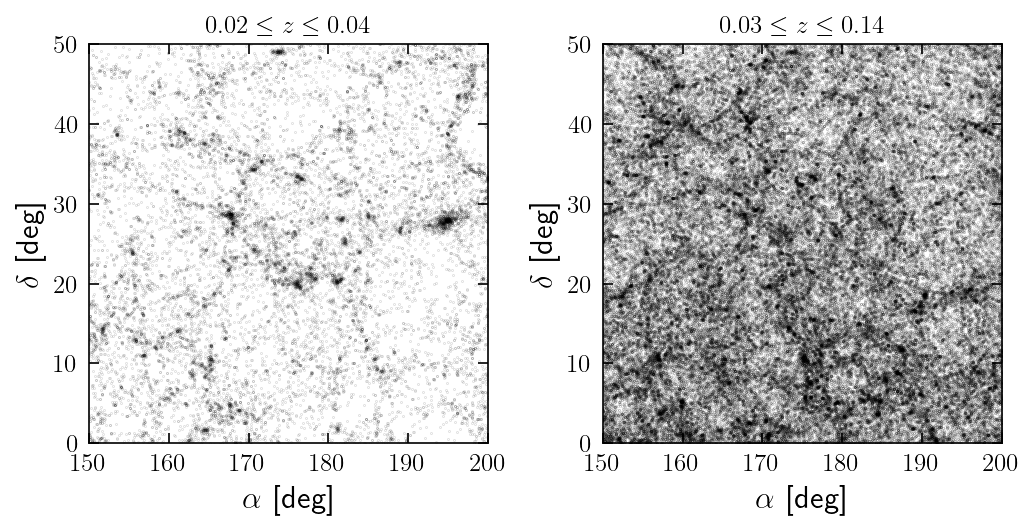

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(7, 5), dpi=150)
ax[0].plot(data.query(f'redshift > {redshift_range_plot[0]} & redshift < {redshift_range_plot[1]}')['ra'], data.query(f'redshift > {redshift_range_plot[0]} & redshift < {redshift_range_plot[1]}')['dec'], 'k.', markersize=.1)
ax[1].plot(data.query(f'redshift > {redshift_range[0]} & redshift < {redshift_range[1]}')['ra'], data.query(f'redshift > {redshift_range[0]} & redshift < {redshift_range[1]}')['dec'], 'k.', markersize=.1)

ax[0].set_title(rf'$ {redshift_range_plot[0]} \leq z \leq {redshift_range_plot[1]}$')
ax[1].set_title(rf'$ {redshift_range[0]} \leq z \leq {redshift_range[1]}$')

for i in range(2):
    ax[i].set_xlabel(r'$\alpha$ [deg]')
    ax[i].set_ylabel(r'$\delta$ [deg]')
    ax[i].set_xlim(ra_range[0], ra_range[1])
    ax[i].set_ylim(dec_range[0], dec_range[1])
    ax[i].set_aspect('equal')

fig.tight_layout()

#### A test of the Cosmological Principle should depend on the size scales being considered, revealing inhomogeneity and anisotropy on the smallest scales while demonstrating homogeneity and isotropy on the largest scales.


#### SDSS is a flux-limited survey, meaning it only detects objects above a certain brightness threshold, leading to the Malmquist Bias. It is also subject to the Eddington Bias, where scatter in measurements near the detection threshold affects the observed distribution. To minimize these biases, we focus on galaxies within the redshift range  $0.03 \leq z \leq 0.14 $.

#### Since  $z < 1$  for the galaxies of interest, we use the $d = c\,z / H_0$ to compute physical distances from redshift and the Hubble constant.


In [8]:
# data['ra_rad'] = np.radians(data['ra'])
# data['dec_rad'] = np.radians(data['dec'])
H0 = 70 * u.km / u.s / u.Mpc
data['distance'] = (const.c * data['redshift'].values / H0).to(u.Mpc).value # as z << 1

distance_range = (const.c * redshift_range / H0).to(u.Mpc).value
distance_range

array([128.482482, 599.584916])

#### As shown in the next plot, this redshift range corresponds to galaxies from $\sim130\, Mpc$  to  $\sim600\,Mpc$  from Earth.

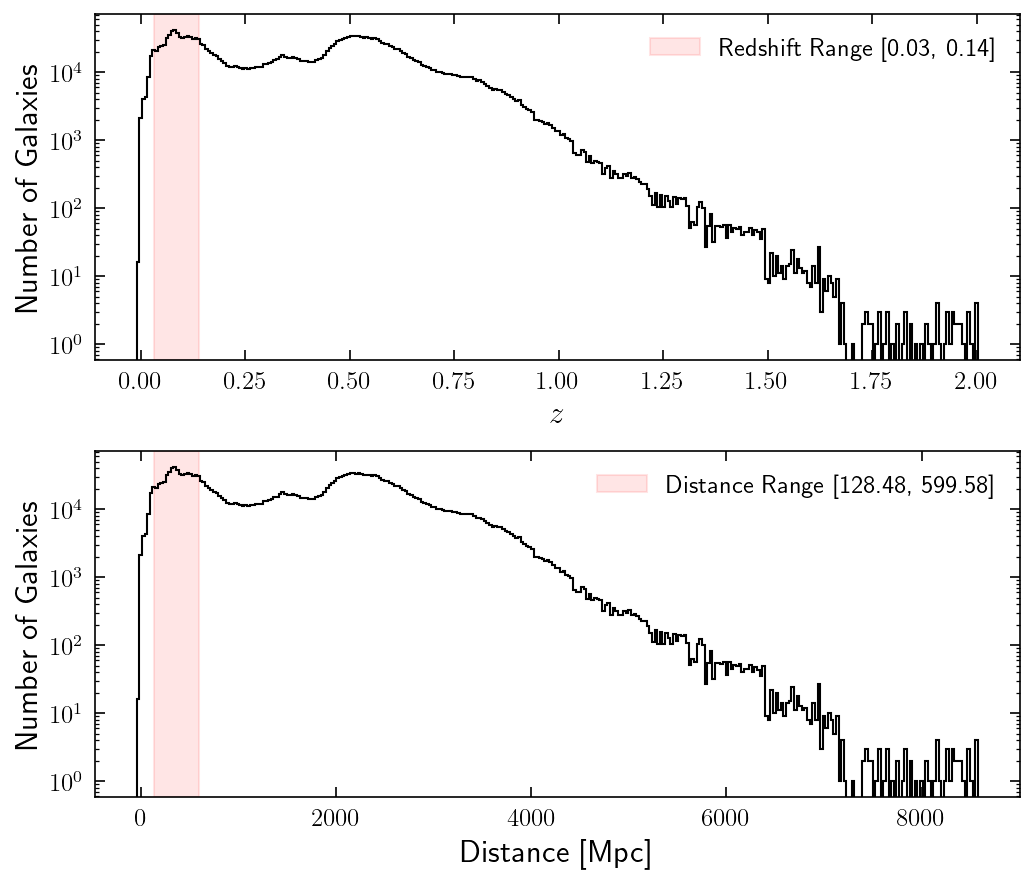

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(7, 6), dpi=150)
ax[0].hist(data['redshift'], bins='scott', histtype='step', color='k')
ax[0].axvspan(redshift_range[0], redshift_range[1], color='r', alpha=0.1, label=fr'Redshift Range [{redshift_range[0]:.2f}, {redshift_range[1]:.2f}]')
ax[0].set_xlabel('$z$')
ax[0].set_ylabel('Number of Galaxies')
ax[0].set_yscale('log')
ax[0].legend()

ax[1].hist(data['distance'], bins='scott', histtype='step', color='k')
ax[1].axvspan(distance_range[0], distance_range[1], color='r', alpha=0.1, label=fr'Distance Range [{distance_range[0]:.2f}, {distance_range[1]:.2f}]')
ax[1].set_xlabel('Distance [Mpc]')
ax[1].set_ylabel('Number of Galaxies')
ax[1].set_yscale('log')
ax[1].legend()

fig.tight_layout()

#### Given the observing strategy of SDSS, a more natural choice for representing the positions of galaxies is the Galactic Coordinate System rather than Equatorial Coordinates, as it uses the Galactic plane as the reference. To account for the discrete survey footprint of SDSS and to minimize potential biases in testing the Cosmological Principle, we restrict our analysis to galaxies within the already mentioned redshift range  $0.03 \leq z \leq 0.14$  and with Galactic latitude  $b \geq 60^\circ$ . This selection ensures that our sample is less affected by dust extinction and other observational biases present at lower Galactic latitudes.

In [10]:
coord_icrs = SkyCoord(ra=data['ra'].values*u.degree, dec=data['dec'].values*u.degree, frame='icrs')
coord_galactic = coord_icrs.galactic
data['l'], data['b'] = coord_galactic.l.degree, coord_galactic.b.degree
data['l_rad'], data['b_rad'] = coord_galactic.l.radian, coord_galactic.b.radian

In [11]:
b_lim = 60

In [12]:
data['cap'] = data['b'] >= b_lim
data['zcap'] = data['cap'] & data['redshift'].between(*redshift_range)

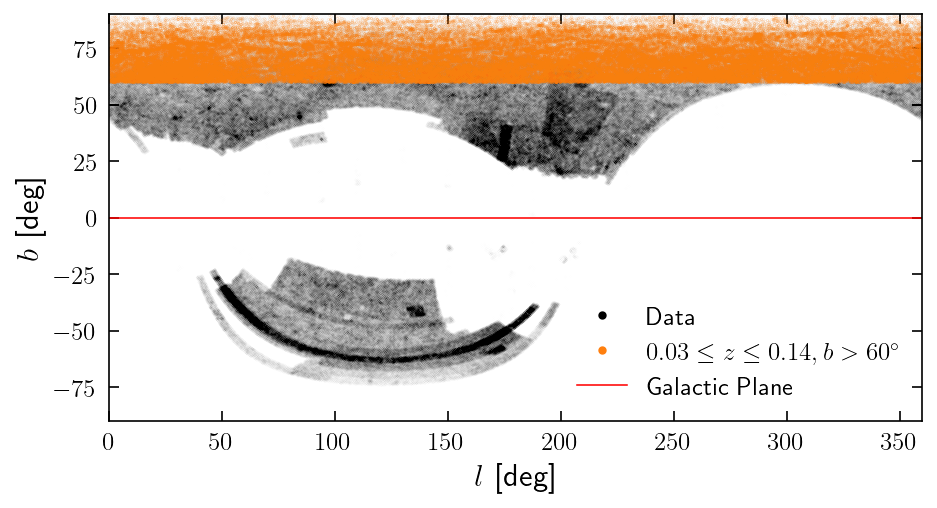

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5), dpi=150)

ax.plot(data['l'], data['b'], 'k.', markersize=0.002)
ax.plot(data.query('zcap')['l'], data.query('zcap')['b'], '.', color='tab:orange', markersize=0.1)
ax.plot([], [], 'k.', label='Data')
ax.plot([], [], '.', c='tab:orange', label=fr'${redshift_range[0]:.2f}\leq z \leq {redshift_range[1]:.2f}, b > {b_lim}^\circ$')
ax.axhline(0, color='r', ls='-', lw=0.75, label='Galactic Plane')

ax.set_xlabel(r'$l$ [deg]')
ax.set_ylabel(r'$b$ [deg]')


l_vals = np.linspace(0, 360, 1000)  # Galactic longitude (l)
b_vals = np.zeros_like(l_vals)  # Galactic latitude (b = 0°)
ax.set_xlim(0, 360)
ax.set_ylim(-90, 90)
ax.legend()
ax.set_aspect('equal')

In [14]:
data.query('zcap')

,objid,ra,dec,u,g,r,i,z,run,rerun,...,plate,mjd,fiberid,distance,l,b,l_rad,b_rad,cap,zcap
711,1237650762393714873,187.234981,-1.916322,18.40240,17.18294,16.82305,16.59682,16.52476,1231,301,...,334,51993,487,177.611528,291.474515,60.453980,5.087190,1.055121,True,True
712,1237650762393714900,187.301037,-2.062461,19.46141,17.98657,17.13484,16.70174,16.38061,1231,301,...,334,51993,508,355.713259,291.657946,60.321695,5.090391,1.052812,True,True
718,1237650762393780370,187.333474,-1.964141,18.77784,16.92692,16.07557,15.68729,15.37496,1231,301,...,334,51993,505,355.000053,291.687942,60.424153,5.090915,1.054600,True,True
719,1237650762393780377,187.340338,-1.946610,19.44048,17.46194,16.53887,16.10542,15.76884,1231,301,...,334,51993,502,355.437407,291.695466,60.442609,5.091046,1.054923,True,True
720,1237650762393780386,187.354643,-1.931005,18.96072,17.62022,16.92443,16.56386,16.32410,1231,301,...,334,51993,511,356.638975,291.718533,60.460456,5.091449,1.055234,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591016,1237671957514485932,201.259780,10.953164,18.27135,16.98991,16.45113,16.13494,15.89956,6166,301,...,1698,53146,2,250.973055,330.581716,71.997060,5.769739,1.256586,True,True
2591017,1237671957514485943,201.197043,10.916661,19.12929,18.06887,17.62269,17.33487,17.27746,6166,301,...,1698,53146,51,484.013639,330.351311,71.989728,5.765718,1.256458,True,True
2591020,1237671957514551373,201.239874,10.907367,20.31455,18.38605,17.38974,16.91919,16.52465,6166,301,...,1698,53146,1,311.269498,330.462222,71.963699,5.767654,1.256003,True,True
2591021,1237671957514551452,201.214701,10.767250,19.48227,18.10433,17.42177,17.07741,16.86839,6166,301,...,1800,53884,389,271.899082,330.201743,71.846656,5.763108,1.253961,True,True


#### The final dataset, shown in orange in the previous plot, consists of approximately 170,000 galaxies. We assume that the volume of space defined by the redshift and Galactic latitude cuts is unbiased, meaning that all galaxies within this volume were equally likely to be observed by SDSS. We do not apply any cut on absolute magnitude. While ultra-diffuse galaxies and ultra-faint galaxies contribute to the overall number density, we assume their impact on the tests of homogeneity and isotropy is minimal.

#### To facilitate the analysis, we transform the Galactic coordinates from a spherical to a Cartesian representation, which is more suitable for volume calculations and grid-based analysis.

In [15]:
def spherical_to_cartesian(long, lat, r):
    x = r * np.cos(lat) * np.cos(long)
    y = r * np.cos(lat) * np.sin(long)
    z = r * np.sin(lat)
    return x, y, z

def cartesian_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    long = np.mod(np.arctan2(y, x), 2*np.pi)
    lat = np.zeros_like(r)
    mask = (r != 0)
    lat[mask] = np.arcsin(z[mask] / r[mask])
    return long, lat, r

In [16]:
data['x'], data['y'], data['z'] = spherical_to_cartesian(data['l_rad'].values, data['b_rad'].values, data['distance'].values)

#### To test the homogeneity of the universe, we construct a 3D grid of cubic volume cells in Cartesian coordinates. The grid is parameterized by the side length of the cubic cells, allowing us to explore different spatial scales. We retain only the volume cells that are fully within the cone defined by the Galactic latitude and redshift (distance) cuts. As an illustrative example of the methodology, we compute the grids for two cell sizes: 10 Mpc and 50 Mpc side lengths.

In [17]:
data_x, data_y, data_z = data.query('zcap')[['x', 'y', 'z']].values.T

In [18]:
def init_grid(x, y, z, side):
    x_min, x_max = np.min(x), np.max(x)
    y_min, y_max = np.min(y), np.max(y)
    z_min, z_max = np.min(z), np.max(z)
    X_grid, Y_grid, Z_grid = np.meshgrid([np.arange(x_min, x_max, side)], [np.arange(y_min, y_max, side)], [np.arange(z_min, z_max, side)], indexing='ij')
    X_points, Y_points, Z_points = X_grid.flatten(), Y_grid.flatten(), Z_grid.flatten()
    X_centers, Y_centers, Z_centers = X_points + side/2, Y_points + side/2, Z_points + side/2    
    return X_centers, Y_centers, Z_centers

def filter_grid(X_centers, Y_centers, Z_centers, r_lims, side, b_rad):
    long_centers, lat_centers, r_centers = cartesian_to_spherical(X_centers, Y_centers, Z_centers)
    mask_cone = (np.abs(lat_centers) >= b_rad) & (r_centers >= r_lims[0] + side/2) & (r_centers <= r_lims[1] - side/2)
    return X_centers[mask_cone], Y_centers[mask_cone], Z_centers[mask_cone]

side_50 = 50
X_centers_50, Y_centers_50, Z_centers_50 = init_grid(data_x, data_y, data_z, side_50) # the data and the grid are in Mpc
X_centersfilt_50, Y_centersfilt_50, Z_centersfilt_50 = filter_grid(X_centers_50, Y_centers_50, Z_centers_50, distance_range, side_50, np.radians(b_lim))

side_10 = 10 
X_centers_10, Y_centers_10, Z_centers_10 = init_grid(data_x, data_y, data_z, side_10) # the data and the grid are in Mpc
X_centersfilt_10, Y_centersfilt_10, Z_centersfilt_10 = filter_grid(X_centers_10, Y_centers_10, Z_centers_10, distance_range, side_10, np.radians(b_lim))

print(f'Number of grid points in the 50 Mpc grid: {len(X_centersfilt_50)}')
print(f'Number of grid points in the 10 Mpc grid: {len(X_centersfilt_10)}')

Number of grid points in the 50 Mpc grid: 415
Number of grid points in the 10 Mpc grid: 58302


#### The next plots display the positions of galaxies in Galactic Cartesian coordinates: (Left Panel) The full SDSS DR18 dataset (black), the unbiased dataset (red), and the grid centers for the 50 Mpc cells. (Right Panel) Only the unbiased dataset and the grid centers are shown. These plots illustrate that the unbiased dataset corresponds to a cone with an aperture angle of  $90^\circ - b$ , originating from Earth and truncated within the redshift cuts. This cone defines the volume within which we perform our homogeneity and isotropy test.

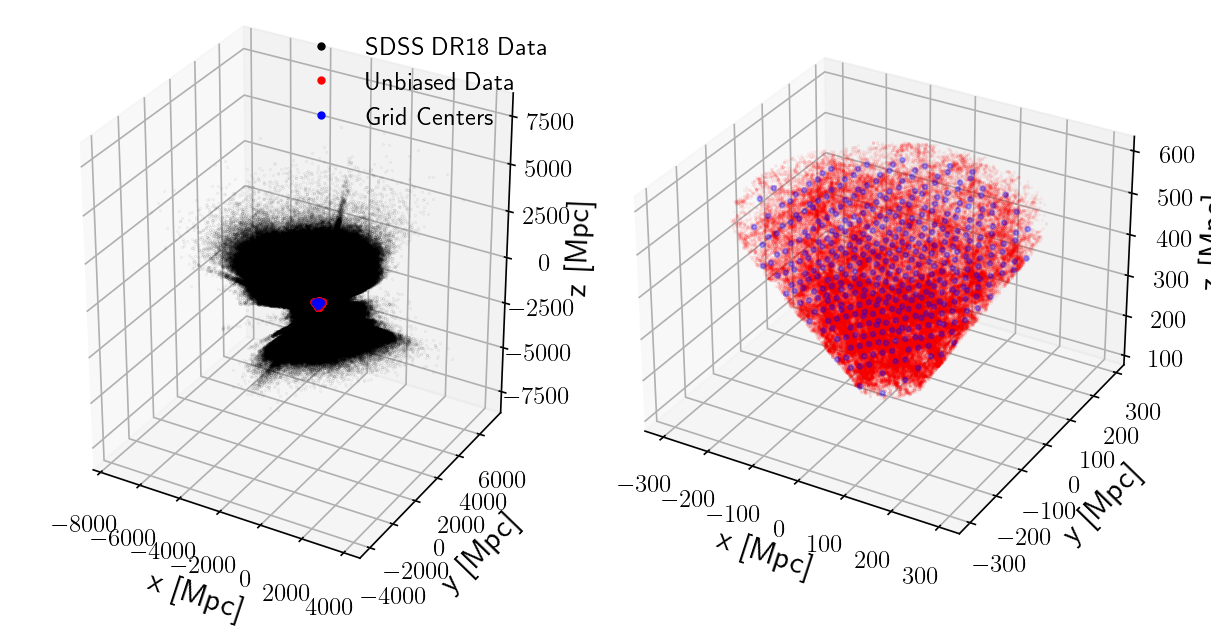

In [19]:
fig = plt.figure(figsize=(8, 4), dpi=150)
ax1 = fig.add_subplot(121, projection='3d') 
ax1.plot(data['x'].values, data['y'].values, data['z'].values, 'k.', markersize=.1, alpha=0.5)
ax1.plot(data.query('zcap')['x'].values, data.query('zcap')['y'].values, data.query('zcap')['z'].values, 'r.', markersize=.1, alpha=0.5)
ax1.plot([], [], 'k.', label='SDSS DR18 Data')
ax1.plot([], [], 'r.', label=fr'Unbiased Data')
ax1.plot([], [], 'b.', label=fr'Grid Centers')
ax1.set_xlabel('x [Mpc]')
ax1.set_ylabel('y [Mpc]')
ax1.set_zlabel('z [Mpc]')
ax1.legend(loc='upper right')
ax1.set_aspect('equal')
ax2 = fig.add_subplot(122, projection='3d') 
ax2.plot(data.query('zcap')['x'].values, data.query('zcap')['y'].values, data.query('zcap')['z'].values, 'r.', markersize=.5, alpha=.1)
# ax2.plot(data.query('zcap')['x'].mean(), data.query('zcap')['y'].mean(), data.query('zcap')['z'].mean(), 'bx', markersize=5)
ax2.set_xlabel('x [Mpc]')
ax2.set_ylabel('y [Mpc]')
ax2.set_zlabel('z [Mpc]')
ax2.set_aspect('equal')

ax1.scatter(X_centersfilt_50, Y_centersfilt_50, Z_centersfilt_50, color='b', marker='o', alpha=0.3, s=.1)
ax2.scatter(X_centersfilt_50, Y_centersfilt_50, Z_centersfilt_50, color='b', marker='o', alpha=0.3, s=5)

fig.tight_layout()

#### Once the cells are defined, we compute the number density of galaxies within each cell for the two different cell sizes. To quantify the typical value and the dispersion in the number density, we calculate the median and the Median Absolute Deviation (MAD) as a robust measure of spread. Given the large number of 10 Mpc cells (approximately 60,000), we restrict the density computation to 5,000 randomly selected cells to avoid memory constraints.

In [20]:
def compute_density(x, y, z, X_centers, Y_centers, Z_centers, side, N=None):
    if N is None:
        X_centers_sampled = X_centers
        Y_centers_sampled = Y_centers
        Z_centers_sampled = Z_centers
    else:
        random_indices = np.random.choice(len(X_centers), N, replace=False)
        X_centers_sampled = X_centers[random_indices]
        Y_centers_sampled = Y_centers[random_indices]
        Z_centers_sampled = Z_centers[random_indices]

    # Calculate the boundaries for each grid cell
    x_min = X_centers_sampled - side/2
    x_max = X_centers_sampled + side/2
    y_min = Y_centers_sampled - side/2
    y_max = Y_centers_sampled + side/2
    z_min = Z_centers_sampled - side/2
    z_max = Z_centers_sampled + side/2

    x_reshaped = x[:, np.newaxis]
    y_reshaped = y[:, np.newaxis]
    z_reshaped = z[:, np.newaxis]

    # Evaluate density only for the selected grid cells
    mask = (
        (x_reshaped >= x_min) & (x_reshaped < x_max) &
        (y_reshaped >= y_min) & (y_reshaped < y_max) &
        (z_reshaped >= z_min) & (z_reshaped < z_max)
    )

    # Sum along the data points axis and normalize by volume
    counts = np.sum(mask, axis=0) 
    densities_sampled = counts / (side**3)
    
    
    return densities_sampled, counts

densities_50, counts_50 = compute_density(data_x, data_y, data_z, X_centersfilt_50, Y_centersfilt_50, Z_centersfilt_50, side_50)
densities_10, counts_10 = compute_density(data_x, data_y, data_z, X_centersfilt_10, Y_centersfilt_10, Z_centersfilt_10, side_10, 5000)

In [21]:
def measure_deviation(xarray):
    median = np.median(xarray)
    mad = np.median(np.abs(xarray - median))
    return median, mad

density_median_50, density_mad_50 = measure_deviation(densities_50)
density_median_10, density_mad_10 = measure_deviation(densities_10)

print(f'For 50 Mpc median: {density_median_50}, MAD: {density_mad_50}')
print(f'For 10 Mpc median: {density_median_10}, MAD: {density_mad_10}')    

For 50 Mpc median: 0.001976, MAD: 0.0009519999999999999
For 10 Mpc median: 0.001, MAD: 0.001


#### The distribution of measured densities is presented for the two cell sizes, revealing the variance in number density across the survey volume. This distribution provides insight into the scale dependence of homogeneity.

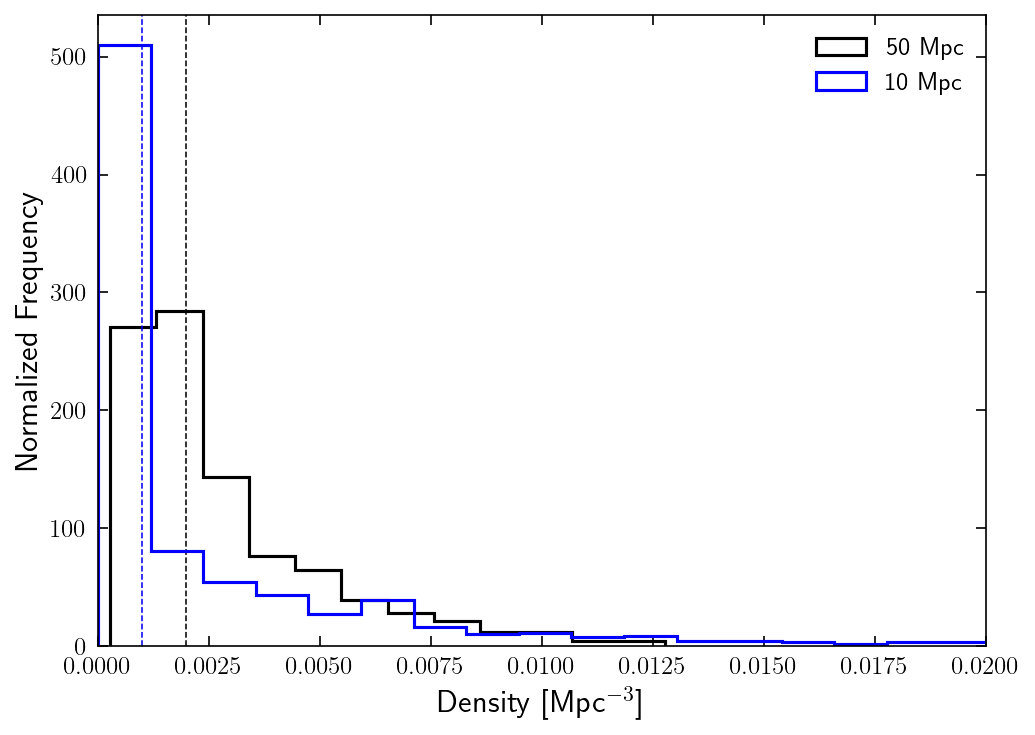

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5), dpi=150)
ax.hist(densities_50, bins='scott', histtype='step', color='k', density=True, lw=1.5, label='50 Mpc')
ax.axvline(density_median_50, color='k', ls='--', lw=0.75)
ax.hist(densities_10, bins='scott', histtype='step', color='b', density=True, lw=1.5, label='10 Mpc')
ax.axvline(density_median_10, color='b', ls='--', lw=0.75)
ax.set_xlabel('Density [Mpc$^{-3}$]')
ax.set_ylabel('Normalized Frequency')
ax.legend()
ax.set_xlim(0, 0.02)
fig.tight_layout()

#### To systematically test the homogeneity of the universe, we examine how the median and dispersion of the number density change as a function of cubic cell size. We compute the densities for cells ranging from 5 Mpc to 110 Mpc in side length, using increments of 5 Mpc.

In [23]:
N_bins = [5000, 5000, 5000, 5000, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
side_array = np.arange(5, 110+5, 5)
side_array

array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110])

In [24]:
len(N_bins) - len(side_array)

0

In [25]:
full_list = []
density_median_array = []
density_mad_array = []  
for side, N in zip(side_array, N_bins): 
    X_centers, Y_centers, Z_centers = init_grid(data_x, data_y, data_z, side) # the data and the grid are in Mpc
    X_centersfilt, Y_centersfilt, Z_centersfilt = filter_grid(X_centers, Y_centers, Z_centers, distance_range, side, np.radians(b_lim))
    densities, counts = compute_density(data_x, data_y, data_z, X_centersfilt, Y_centersfilt, Z_centersfilt, side, N)
    density_median, density_mad = measure_deviation(densities)
    full_list.append((densities, density_median, density_mad, len(X_centersfilt)))
    density_median_array.append(density_median)
    density_mad_array.append(density_mad)
    print(len(X_centersfilt))
density_median_array = np.array(density_median_array)
density_mad_array = np.array(density_mad_array)

472779
58302
17048
7102
3577
2039
1262
836
582
415
300
229
176
143
110
90
76
63
49
40
41
36


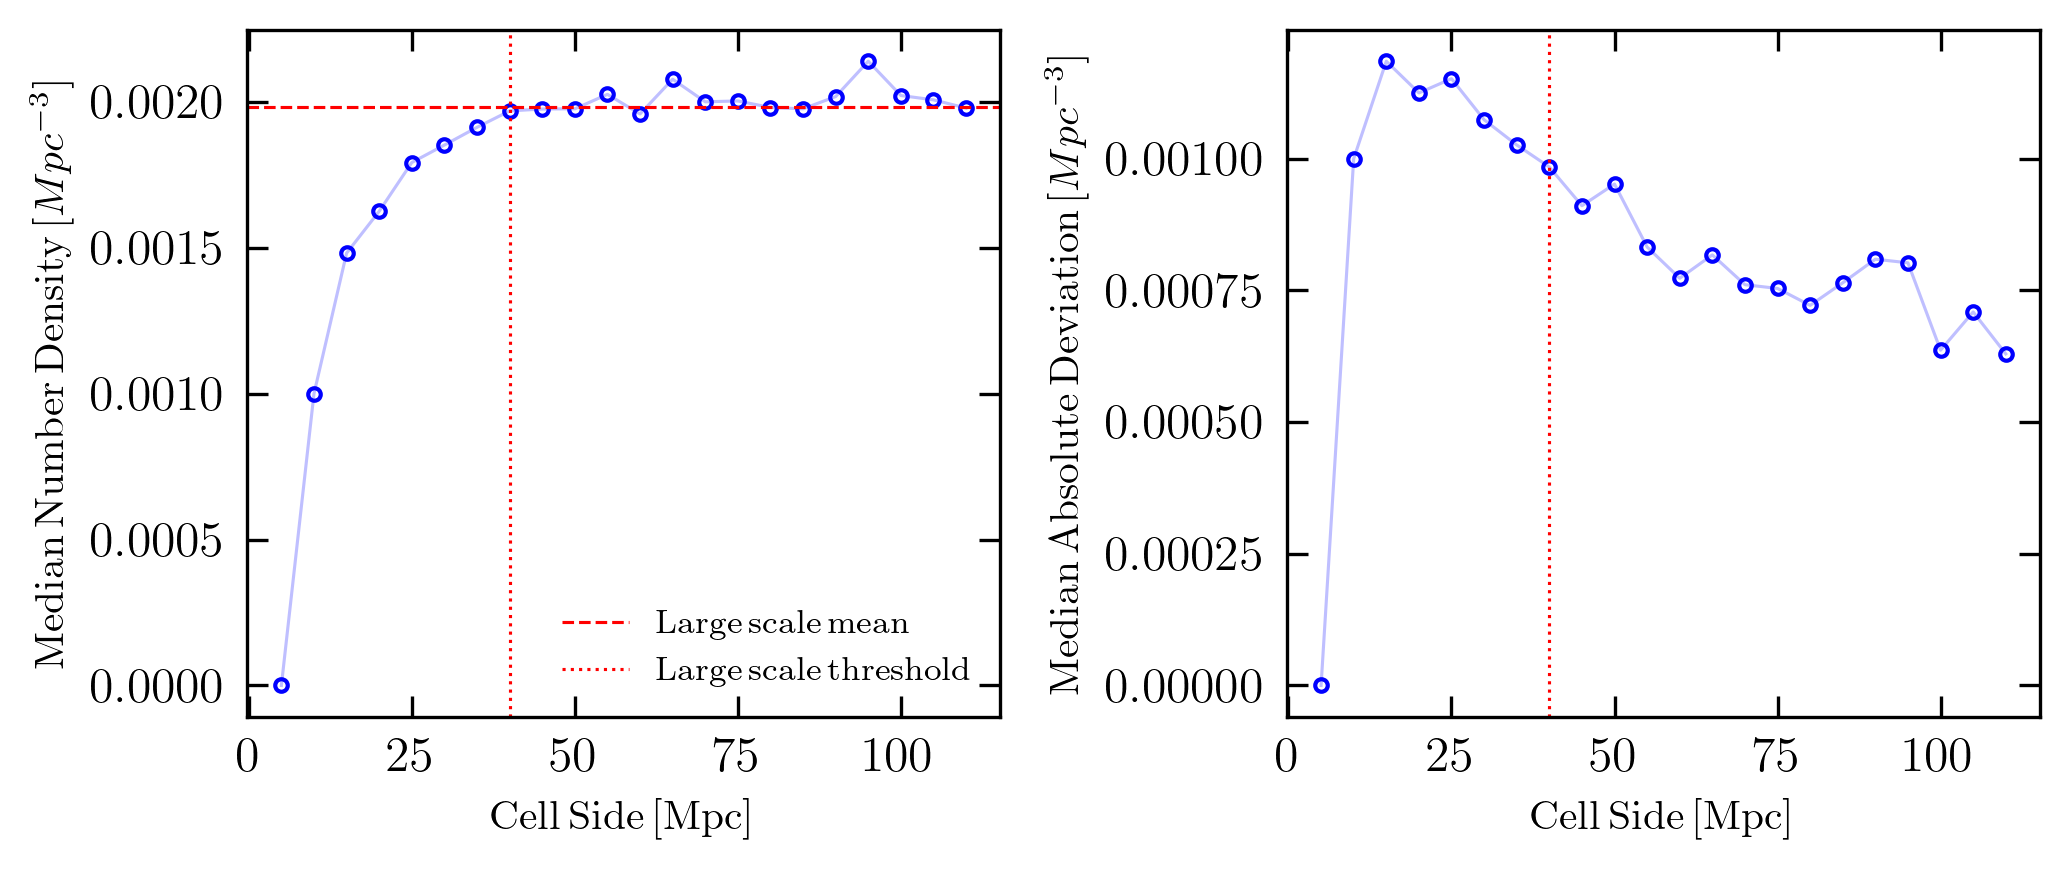

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3), dpi=300)
ax[0].plot(side_array, density_median_array, 'w.', lw=1.5, mec='b')
ax[0].plot(side_array, density_median_array, 'b-', lw=.75, alpha=0.25)
ax[0].axhline(np.mean(density_median_array[4:]), c='r', ls='--', lw=0.75, label=r'$\mathrm{Large \, scale \, mean}$')
ax[0].axvline(40, c='r', ls=':', lw=0.75, label=r'$\mathrm{Large \, scale \, threshold}$')
ax[0].legend(fontsize=8)      
ax[0].set_xlabel(r'$\mathrm{Cell \, Side \, [Mpc]}$', fontsize=10)  
ax[0].set_ylabel(r'$\mathrm{Median \, Number\, Density \,} [Mpc^{-3}]$', fontsize=10)

ax[1].plot(side_array, density_mad_array, 'w.', lw=1.5, label='MAD', mec='b')
ax[1].plot(side_array, density_mad_array, 'b-', lw=.75, alpha=0.25)
ax[1].axvline(40, c='r', ls=':', lw=0.75, label=r'$\mathrm{Large \, scale \, threshold}$')
ax[1].set_xlabel(r'$\mathrm{Cell \, Side \, [Mpc]}$', fontsize=10)
ax[1].set_ylabel(r'$\mathrm{Median \, Absolute \, Deviation} \, [Mpc^{-3}]$', fontsize=10)

fig.tight_layout()

#### The previous plots shows the results of the median (left) and dispersion (right) of the density for the different cell sizes:

#### Left Plot: The median number density is low for small cell sizes, reflecting the low filling factor of baryonic matter in the form of galaxies. As the cell size increases, the median number density converges to a constant value (horizontal dashed line) beyond a threshold of approximately 40 Mpc (vertical dotted line). This convergence indicates the scale of homogeneity where the universe appears uniformly distributed.

#### Right Plot: The dispersion in number density decreases as the cell size increases, suggesting that different regions of space become more similar at larger scales. This trend supports the Cosmological Principle of large-scale homogeneity.

#### Due to the limited volume of the SDSS dataset, extending this analysis to larger scales is challenging due to small-number statistics and undersampling effects.

#### To test the isotropy of the universe, we analyze the sky density of galaxies in different directions using the HEALPix tessellation, which divides the sky into equal-area pixels. As an illustrative example, we show the sky distribution for the unbiased dataset with 3.36 $deg^2$ pixels.

In [27]:
NSIDE = 32
pixarea = hp.nside2pixarea(NSIDE, degrees=True)  
NPIX = hp.nside2npix(NSIDE)  
print(f'Pixel area: {pixarea} deg^2')
print(f'Number of pixels: {NPIX}')

Pixel area: 3.357174580844667 deg^2
Number of pixels: 12288


In [28]:
sky_coords = SkyCoord(l=data.query('zcap')['l'].values * u.deg, 
                      b=data.query('zcap')['b'].values * u.deg, 
                      frame='galactic')

def compute_density_map(coords, NSIDE):
    NPIX = hp.nside2npix(NSIDE)  
    pixarea = hp.nside2pixarea(NSIDE, degrees=True)  
    pix_indices = hp.ang2pix(NSIDE, coords.l.deg, coords.b.deg, lonlat=True)  # Convert to HEALPix pixel indices
    print(f"Number of unique occupied pixels: {len(np.unique(pix_indices))}")
    density_map = np.zeros(NPIX)
    for pix in pix_indices:
        density_map[pix] += 1
    
    occupied_pixels = np.where(density_map > 0)[0]  # Indices of occupied pixels
    density_map = density_map / pixarea
    density_values = density_map[occupied_pixels]   # Corresponding densities

    return density_map, density_values

density_map_32, density_values_32 = compute_density_map(sky_coords, 2**5)

Number of unique occupied pixels: 924


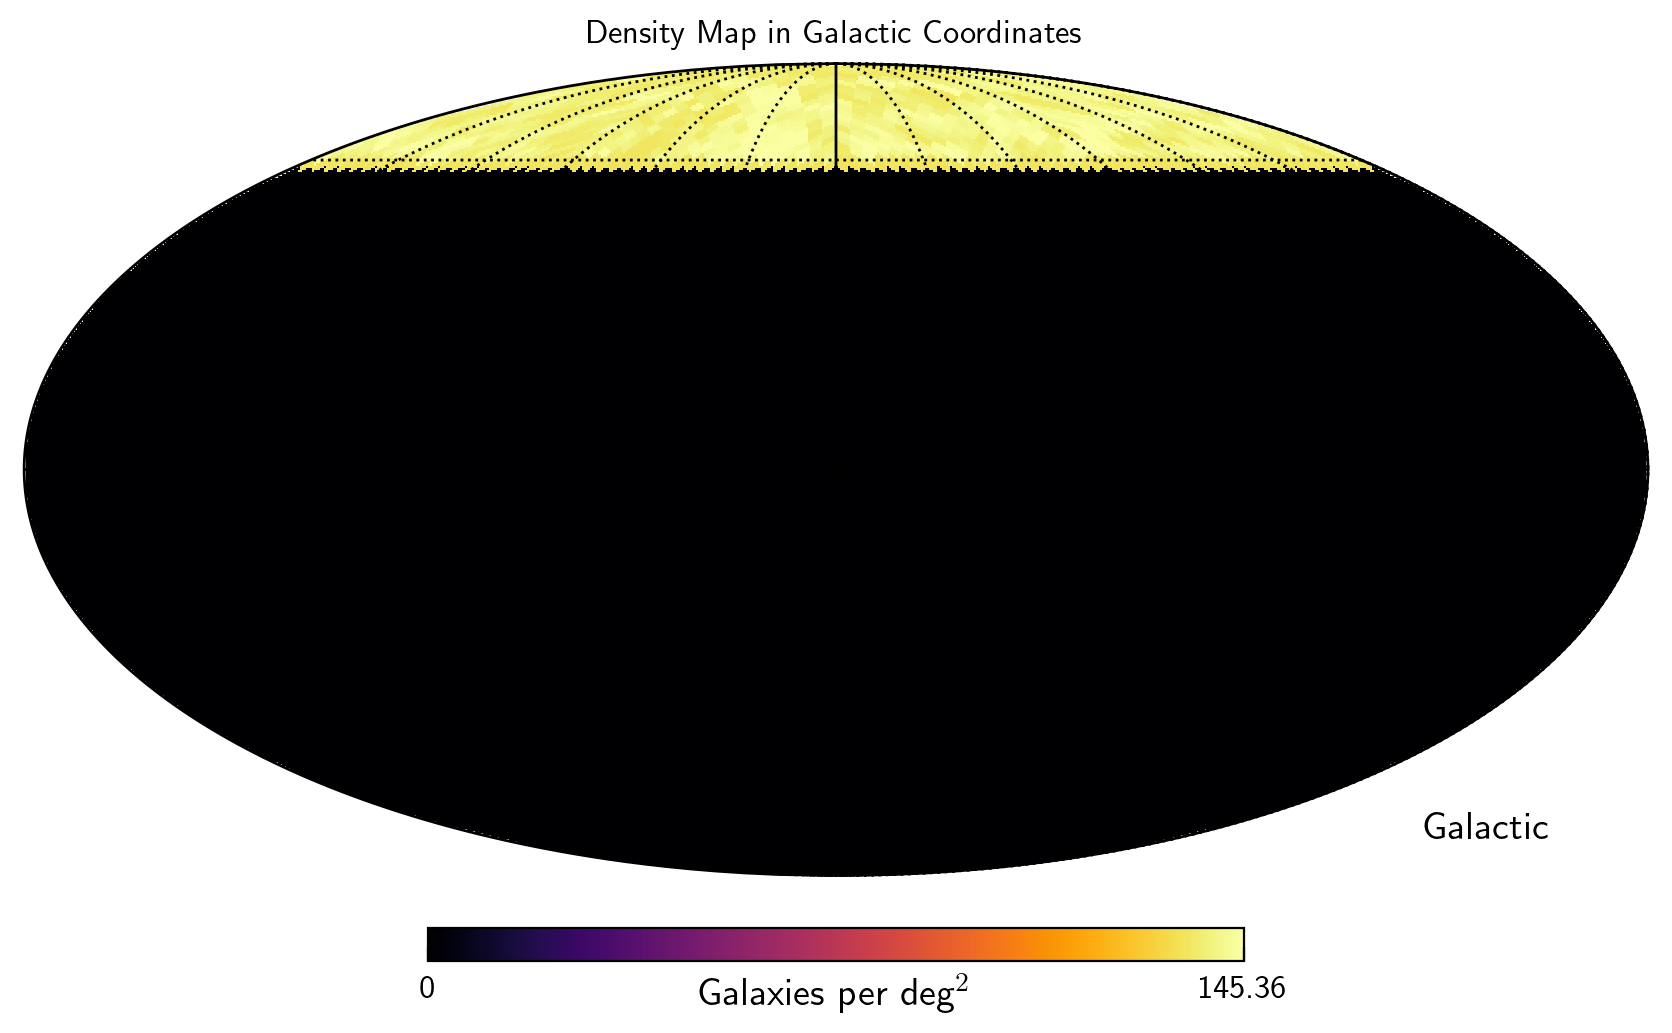

In [29]:
hp.mollview(density_map_32, coord='G', 
            title='Density Map in Galactic Coordinates', 
            unit='Galaxies per deg$^2$', 
            norm='hist', 
            cmap='inferno')
hp.graticule()
plt.show()

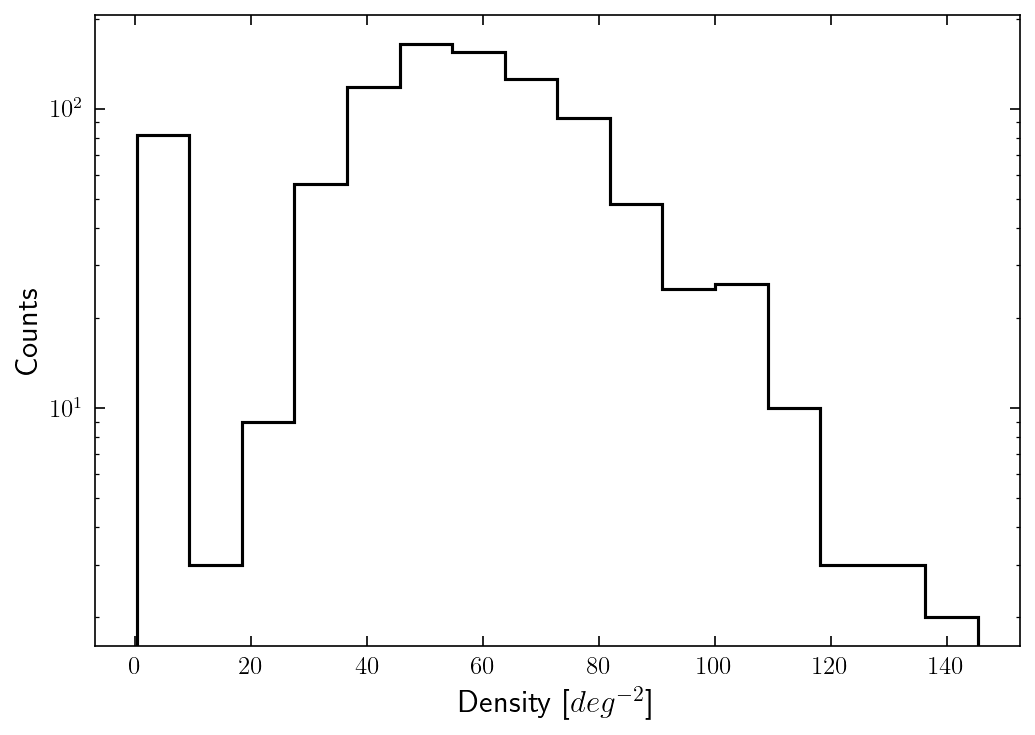

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5), dpi=150)
ax.hist(density_values_32, bins='scott', histtype='step', color='k', density=False, lw=1.5)
ax.set_xlabel('Density [$deg^{-2}$]')
ax.set_ylabel('Counts')
ax.set_yscale('log')
fig.tight_layout()

#### Similar to the homogeneity test, we calculate the sky density across the sky, computing the median sky density and the MAD of the sky density. We perform this analysis for different pixel areas, ranging from  $2 \times 10^{-4}$  to 13.5 $deg^2$.

In [31]:
nside_array = 2**np.arange(4, 12+1, 1)
nside_array

array([  16,   32,   64,  128,  256,  512, 1024, 2048, 4096])

In [32]:
pixarea_array = hp.nside2pixarea(nside_array, degrees=True)
print(f'minimum pixel area: {pixarea_array.min()}')
print(f'maximum pixel area: {pixarea_array.max()}')

minimum pixel area: 0.00020490567510038252
maximum pixel area: 13.428698323378669


In [33]:
density_values_array = []
density_values_median_array = []
density_values_mad_array = []

for nside in nside_array:
    density_map, density_values = compute_density_map(sky_coords, nside)
    density_median, density_mad = measure_deviation(density_values)
    density_values_array.append(density_values)
    density_values_median_array.append(density_median)
    density_values_mad_array.append(density_mad)

# density_values_array = np.array(density_values_array)
density_values_median_array = np.array(density_values_median_array)
density_values_mad_array = np.array(density_values_mad_array)

Number of unique occupied pixels: 264
Number of unique occupied pixels: 924
Number of unique occupied pixels: 3444
Number of unique occupied pixels: 13317
Number of unique occupied pixels: 47238
Number of unique occupied pixels: 102964
Number of unique occupied pixels: 143993
Number of unique occupied pixels: 163275
Number of unique occupied pixels: 170136


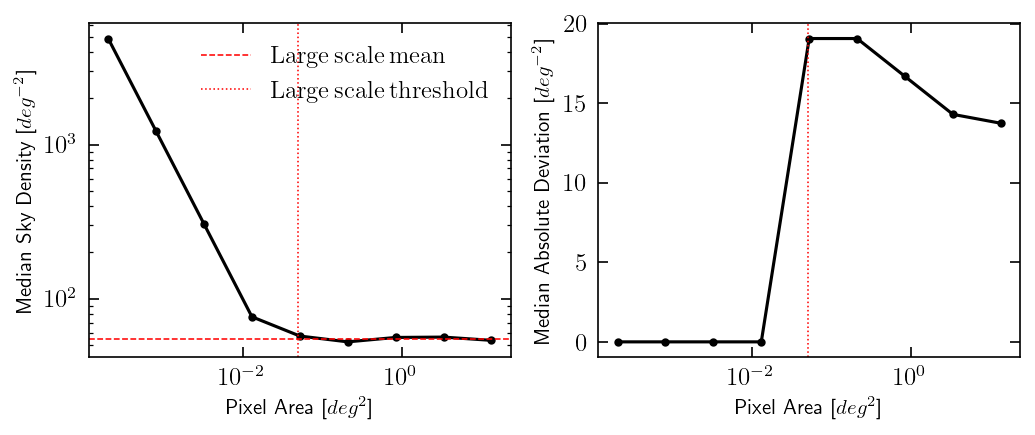

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3), dpi=150)
ax[0].plot(pixarea_array, density_values_median_array, 'k.-', lw=1.5)
ax[0].axhline(np.mean(density_values_median_array[:4]), c='r', ls='--', lw=0.75, label=r'$\mathrm{Large \, scale \, mean}$')
ax[0].axvline(0.05, c='r', ls=':', lw=0.75, label=r'$\mathrm{Large \, scale \, threshold}$')
ax[0].set_xlabel('Pixel Area [$deg^{2}$]', fontsize=10)  
ax[0].set_ylabel('Median Sky Density [$deg^{-2}$]', fontsize=10)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].legend()    

ax[1].plot(pixarea_array, density_values_mad_array, 'k.-', lw=1.5, label='MAD')
ax[1].axvline(0.05, c='r', ls=':', lw=0.75, label=r'$\mathrm{Large \, scale \, threshold}$')
ax[1].set_xlabel('Pixel Area [$deg^{2}$]', fontsize=10)
ax[1].set_ylabel('Median Absolute Deviation [$deg^{-2}$]', fontsize=10)
ax[1].set_xscale('log')
# ax[1].set_yscale('log')

fig.tight_layout()


#### Left Plot: The median sky density decreases with increasing pixel area until a threshold of approximately 0.01 $deg^2$, after which it remains constant. This trend suggests the transition to isotropy, where the universe appears uniform regardless of the direction of observation.

#### Right Plot: The dispersion in sky density plot indicates that beyond the large-scale isotropy threshold, the dispersion decreases, consistent with a uniform large-scale universe. However, this method is strongly affected by small number statistics and edge effects due to the limited sky coverage of the dataset.

## Conclusion

#### The Cosmological Principle, which assumes homogeneity and isotropy of the universe on large scales, is a cornerstone of modern cosmology. While the CMB provides a powerful test of this principle across the whole sky, the advent of large-scale galaxy surveys enables us to probe the validity of homogeneity and isotropy across different spatial scales. With these surveys we can explore the regimes where the Cosmological Principle holds and to investigate potential deviations that could provide new insights into the structure and evolution of the universe.

# Bibliography

#### - Almeida, A., Anderson, S. F., Argudo-Fernández, M., Badenes, C., Barger, K., Barrera-Ballesteros, J. K., ... & Wojno, L. (2023). The eighteenth data release of the sloan digital sky surveys: Targeting and first spectra from sdss-v. The Astrophysical Journal Supplement Series, 267(2), 44.

#### - Maartens, R. (2011). Is the Universe homogeneous?. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 369(1957), 5115-5137.

#### - Longo, M. J. (2014). Testing cosmic homogeneity and isotropy using galaxy correlations. arXiv preprint arXiv:1405.7621.

#### - Sarkar, S., Pandey, B., & Khatri, R. (2019). Testing isotropy in the Universe using photometric and spectroscopic data from the SDSS. Monthly Notices of the Royal Astronomical Society, 483(2), 2453-2464.